<a href="https://colab.research.google.com/github/kevinokelly94/for/blob/main/TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = ('electricity.csv')
df = pd.read_csv(data)

# Assuming 'DateTime' is already in the correct datetime format and set it as the index
df.set_index('DateTime', inplace=True)

# Print the first few rows to confirm it's loaded correctly
print(df.head())


            Consumption  Production  Nuclear   Wind  Hydroelectric  \
DateTime                                                             
01/01/2019       142984      142186    33402   8246          30861   
02/01/2019       151729      163097    33380  26562          30065   
03/01/2019       174098      172854    32929  23743          35453   
04/01/2019       183242      191724    32914  44510          33884   
05/01/2019       177114      164069    33440  15108          29089   

            Oil and Gas   Coal  Solar  Biomass  
DateTime                                        
01/01/2019        34032  33809   1039      787  
02/01/2019        38764  32175   1280      858  
03/01/2019        43732  35225    800      956  
04/01/2019        41808  36469   1092     1038  
05/01/2019        44158  39031   2226     1008  


     DateTime  Consumption  Production  Nuclear   Wind  Hydroelectric  \
0  01/01/2019       142984      142186    33402   8246          30861   
1  02/01/2019       151729      163097    33380  26562          30065   
2  03/01/2019       174098      172854    32929  23743          35453   
3  04/01/2019       183242      191724    32914  44510          33884   
4  05/01/2019       177114      164069    33440  15108          29089   

   Oil and Gas   Coal  Solar  Biomass  
0        34032  33809   1039      787  
1        38764  32175   1280      858  
2        43732  35225    800      956  
3        41808  36469   1092     1038  
4        44158  39031   2226     1008  


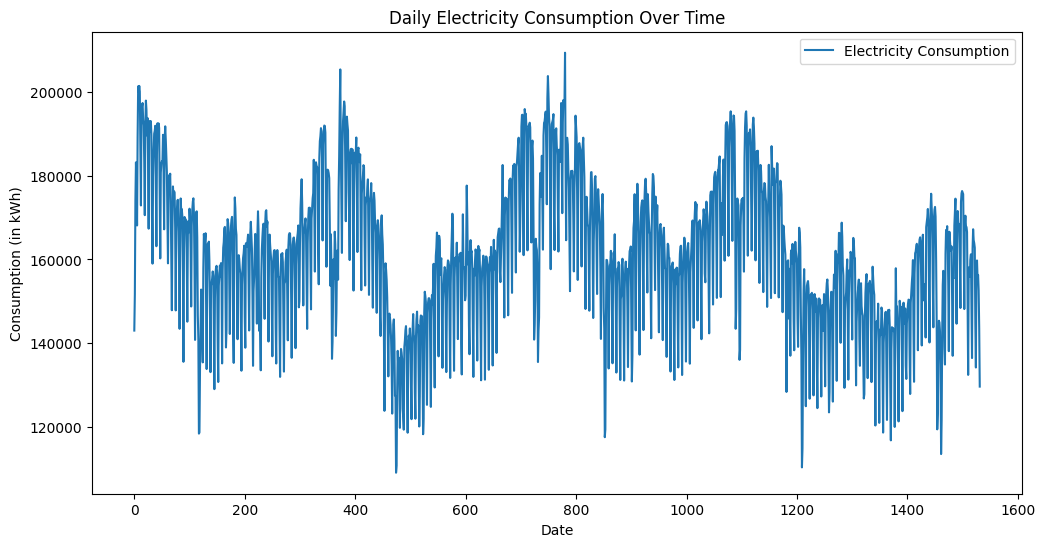

In [ ]:
# Display the first few rows of the dataset
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

data = ('electricity.csv')
df = pd.read_csv(data)

print(df.head())

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Consumption'], label='Electricity Consumption')
plt.title('Daily Electricity Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Consumption (in kWh)')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model
ets_model = ExponentialSmoothing(df['Consumption'], trend='add', seasonal=None, seasonal_periods=None)
ets_fit = ets_model.fit()

# Forecast
ets_forecast = ets_fit.forecast(steps=10)
print(ets_forecast)


1532    129026.883513
1533    128406.687536
1534    127786.491558
1535    127166.295580
1536    126546.099602
1537    125925.903625
1538    125305.707647
1539    124685.511669
1540    124065.315691
1541    123445.119714
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the model
arima_model = ARIMA(df['Consumption'], order=(1, 1, 1))  # Adjust parameters as necessary
arima_fit = arima_model.fit()

# Forecast
arima_forecast = arima_fit.get_forecast(steps=10)
print(arima_forecast.summary_frame())

Consumption           mean       mean_se  mean_ci_lower  mean_ci_upper
1532         138610.058655  11549.462439  115973.528233  161246.589076
1533         143855.038525  13800.113614  116807.312859  170902.764191
1534         146901.509749  14758.715753  117974.958415  175828.061083
1535         148671.008803  15261.253447  118759.501687  178582.515918
1536         149698.796912  15573.124992  119176.032801  180221.561024
1537         150295.772874  15796.346641  119335.502371  181256.043377
1538         150642.517787  15974.934977  119332.220576  181952.814997
1539         150843.919589  16129.632670  119230.420472  182457.418706
1540         150960.900933  16270.901765  119070.519477  182851.282389
1541         151028.847867  16404.286276  118877.037574  183180.658159


In [ ]:
import pandas as pd
from typing import Union
from tqdm.notebook import tqdm
from statsmodels.tsa.statespace.varmax import VARMAX

def optimize_VAR(file_path: str) -> pd.DataFrame:
    # Load the dataset
    df = pd.read_csv(file_path)  # Corrected from 'data' to 'file_path'
    # Convert 'DateTime' to datetime, specifying the day-first format
    df['DateTime'] = pd.to_datetime(df['DateTime'], dayfirst=True)  # Adjusted for day-first format
    df.set_index('DateTime', inplace=True)

    results = []
    # Use tqdm for a progress bar in the loop
    for i in tqdm(range(9)):  # Adjust range if needed for more comprehensive testing
        try:
            # Assuming the DataFrame df has multiple time series columns that you want to model
            # Fit the model with a simple VARMAX: here just VAR part since MA order is set to 0
            model = VARMAX(df, order=(i, 0)).fit(disp=False)
        except Exception as e:
            print(f"Failed to fit model for order {i}: {str(e)}")
            continue

        # Store AIC and the order
        aic = model.aic
        results.append([i, aic])

    # Convert results to DataFrame
    result_df = pd.DataFrame(results, columns=['p', 'AIC'])
    # Sort by AIC
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

# Example usage:
# Assuming 'file_path' is the path to your data file
file_path = 'electricity.csv'
result_df = optimize_VAR(file_path)
print(result_df)


  0%|          | 0/9 [00:00<?, ?it/s]

Failed to fit model for order 0: Invalid VARMAX(p,q) specification; at least one p,q must be greater than zero.
Failed to fit model for order 1: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'
Failed to fit model for order 2: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'
Failed to fit model for order 3: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'
Failed to fit model for order 4: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'
Failed to fit model for order 5: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'
Failed to fit model for order 6: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'
Failed to fit model for order 7: Cannot cast ufunc 'su

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR, VARMAX
from statsmodels.tsa.stattools import adfuller

# Load data
file_path = 'electricity.csv'
df = pd.read_csv(file_path)
df['DateTime'] = pd.to_datetime(df['DateTime'], dayfirst=True)
df.set_index('DateTime', inplace=True)

# Check stationarity
def check_stationarity(data):
    result = adfuller(data.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])

for column in df.columns:
    print(f"Stationarity check for {column}:")
    check_stationarity(df[column])

# Example, difference data if needed
df_diff = df.diff().dropna()


Stationarity check for Consumption:
ADF Statistic: -3.4509897089121884
p-value: 0.009338691392625264
Stationarity check for Production:
ADF Statistic: -3.796505247531801
p-value: 0.0029432739518514555
Stationarity check for Nuclear:
ADF Statistic: -5.205254389079413
p-value: 8.577495214145923e-06
Stationarity check for Wind:
ADF Statistic: -10.197380043238594
p-value: 6.095916582688642e-18
Stationarity check for Hydroelectric:
ADF Statistic: -3.419909026968519
p-value: 0.010298610692041707
Stationarity check for Oil and Gas:
ADF Statistic: -3.7479981776718816
p-value: 0.0034864938178404336
Stationarity check for Coal:
ADF Statistic: -3.726114206455466
p-value: 0.0037604735443122106
Stationarity check for Solar:
ADF Statistic: -3.1086946691597857
p-value: 0.02591639950315517
Stationarity check for Biomass:
ADF Statistic: -3.151116342500376
p-value: 0.022994430685827502


In [ ]:
# Fit VAR model
model_var = VAR(df_diff)
results_var = model_var.fit(maxlags=15, ic='aic')
print(results_var.summary())

# Forecasting with VAR
lag_order = results_var.k_ar
forecast_var = results_var.forecast(df_diff.values[-lag_order:], steps=5)
print(forecast_var)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 09, May, 2024
Time:                     19:59:24
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    128.821
Nobs:                     1523.00    HQIC:                   127.378
Log likelihood:          -115139.    FPE:                8.87392e+54
AIC:                      126.522    Det(Omega_mle):     5.82263e+54
--------------------------------------------------------------------
Results for equation Consumption
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                  -69.021810       144.627776           -0.477           0.633
L1.Consumption          -0.144139         0.032178           -4.479           0.000
L1.Production          -29.871299        1

In [ ]:
# Fit VARMA model, assuming we use p=2, q=2 as an example
model_varma = VARMAX(df_diff, order=(2, 2))
results_varma = model_varma.fit(disp=False)
print(results_varma.summary())

# Forecasting with VARMA
forecast_varma = results_varma.forecast(steps=5)
print(forecast_varma)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                                                        Statespace Model Results                                                                        
Dep. Variable:     ['Consumption', 'Production', 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']   No. Observations:                 1531
Model:                                                                                                               VARMA(2,2)   Log Likelihood             -117356.680
                                                                                                                    + intercept   AIC                         235469.359
Date:                                                                                                          Thu, 09 May 2024   BIC                         237485.489
Time:                                                                                                                  20:19:52   HQIC                     